<a href="https://colab.research.google.com/github/VasaviSure/Multimodal-Malnutrition-Detection/blob/main/Malnutrition_Detection_MM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
# ======================
from google.colab import drive
drive.mount('/content/drive')

# Path where dataset is stored in Drive
# Example: /content/drive/MyDrive/dataset/train , /val
data_dir = "/content/drive/MyDrive/Malnutrition"

Mounted at /content/drive


In [ ]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, WeightedRandomSampler
from collections import Counter

# 🔧 Define preprocessing transforms
data_transforms = {
    "train": transforms.Compose([
        transforms.Resize((224, 224)),                  # Resize to model input size
        transforms.RandomHorizontalFlip(),              # Augmentation
        transforms.RandomRotation(15),                  # Augmentation
        transforms.ColorJitter(brightness=0.2, contrast=0.2),  # Augmentation
        transforms.ToTensor(),                          # Convert to tensor
        transforms.Normalize([0.485, 0.456, 0.406],      # Normalize using ImageNet stats
                             [0.229, 0.224, 0.225])
    ]),
    "val": transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
}

In [ ]:
import os
import pandas as pd
import random

# Base dataset folder
base_folder = "/content/drive/MyDrive/Malnutrition/Malnutrition/Train"

# Output CSV file
output_csv = "Facial_Body_Training1.csv"

# Healthy-specific features
healthy_features = [
    "Bright_Eyes",
    "Glowing_Skin",
    "Normal_Cheeks",
    "Good_Hair_Texture",
    "Normal_Muscle_Tone",
    "Steady_Posture",
    "Healthy_Weight",
    "Alert_Facial_Expression",
    "Normal_Abdomen",
    "Active_Body_Language"
]

# Non-healthy (malnutrition-related) features
nonhealthy_features = [
    "Sunken_Cheeks",
    "Puffy_or_Swollen_Eyes",
    "Prominent_Bones",
    "Skin_Texture_Changes",
    "Hair_Thinning_or_Discoloration",
    "Visible_Muscle_Wasting",
    "Thin_Limbs",
    "Distended_Abdomen",
    "Lethargic_or_Weak_Posture",
    "Lack_of_Facial_Expression"
]

# Possible categorical values
labels = ["Yes", "No", "Unknown"]

# Health classes
health_classes = ["Healthy", "Non-Healthy"]

# Collect data for both folders
image_data = []

for health_status in health_classes:
    folder_path = os.path.join(base_folder, health_status)
    if not os.path.exists(folder_path):
        print(f"⚠ Folder not found: {folder_path}")
        continue

    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith((".jpg", ".jpeg", ".png")):
                image_path = os.path.join(root, file)
                image_entry = {
                    "Image_Name": file,
                    "Image_Path": image_path,
                    "Health_Status": health_status
                }

                # Assign features depending on class
                if health_status == "Healthy":
                    # Healthy features → mostly Yes
                    for feature in healthy_features:
                        image_entry[feature] = random.choices(["Yes", "No", "Unknown"], weights=[0.7, 0.2, 0.1])[0]
                    # Non-healthy features → mostly No
                    for feature in nonhealthy_features:
                        image_entry[feature] = random.choices(["No", "Yes", "Unknown"], weights=[0.7, 0.2, 0.1])[0]
                else:
                    # Non-healthy images → mostly Yes for unhealthy features
                    for feature in nonhealthy_features:
                        image_entry[feature] = random.choices(["Yes", "No", "Unknown"], weights=[0.7, 0.2, 0.1])[0]
                    # Healthy features → mostly No
                    for feature in healthy_features:
                        image_entry[feature] = random.choices(["No", "Yes", "Unknown"], weights=[0.7, 0.2, 0.1])[0]

                image_data.append(image_entry)

# Convert to DataFrame
df = pd.DataFrame(image_data)

# Save to CSV
df.to_csv(output_csv, index=False)

print(f"✅ Dataset created with {len(df)} images: {output_csv}")
print(df.head())

✅ Dataset created with 1639 images: Facial_Body_Training1.csv
     Image_Name                                         Image_Path  \
0  NU (103).jpg  /content/drive/MyDrive/Malnutrition/Malnutriti...   
1  NU (101).jpg  /content/drive/MyDrive/Malnutrition/Malnutriti...   
2  NU (108).jpg  /content/drive/MyDrive/Malnutrition/Malnutriti...   
3  NU (109).jpg  /content/drive/MyDrive/Malnutrition/Malnutriti...   
4  NU (105).jpg  /content/drive/MyDrive/Malnutrition/Malnutriti...   

  Health_Status Bright_Eyes Glowing_Skin Normal_Cheeks Good_Hair_Texture  \
0       Healthy         Yes          Yes           Yes                No   
1       Healthy         Yes          Yes           Yes                No   
2       Healthy         Yes          Yes           Yes               Yes   
3       Healthy     Unknown          Yes           Yes               Yes   
4       Healthy          No          Yes           Yes               Yes   

  Normal_Muscle_Tone Steady_Posture Healthy_Weight  ... Sunk

In [ ]:
import pandas as pd

# === 1. Load your two CSV files ===
import pandas as pd

# === Step 1: Read both CSV files ===
file1 = "/content/Facial_Body_Training1.csv"  # CSV with 1639 rows
file2 = "/content/Facial_Body_Validation1.csv"  # CSV with 561 rows

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# === Step 2: Merge all data (union of both datasets) ===
# This ensures NO data is lost — all rows & columns from both files are kept.
merged_df = pd.concat([df1, df2], axis=0, ignore_index=True, join="outer")

# === Step 3: Fill missing values if needed (optional) ===
# merged_df.fillna("NA", inplace=True)  # You can replace NA with Yes/No, etc.

# === Step 4: Save the merged dataset ===
merged_df.to_csv("merged1_complete.csv", index=False)

# === Step 5: Print details ===
print("✅ Merging completed successfully!")
print(f"Total Rows in merged file: {merged_df.shape[0]}")
print(f"Total Columns in merged file: {merged_df.shape[1]}")
print("File saved as: merged1_complete.csv")



✅ Merging completed successfully!
Total Rows in merged file: 2084
Total Columns in merged file: 23
File saved as: merged1_complete.csv


In [ ]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

# ---------- User settings ----------
CSV_PATH = "/content/merged1_complete.csv"   # <-- change
ID_COL = None                # optional id column to ignore, e.g. "Image_Name"
# -----------------------------------

# Load
df = pd.read_csv(CSV_PATH)

# Standardize missing markers -> np.nan
missing_markers = ['unknown', 'Unknown', 'UNK', '?', 'NA', 'na', 'null', 'NULL', '']
df.replace(missing_markers, np.nan, inplace=True)

# Optionally drop/keep ID
if ID_COL is not None and ID_COL in df.columns:
    ids = df[ID_COL].copy()
    df.drop(columns=[ID_COL], inplace=True)
else:
    ids = None

# Separate column types
# Heuristic: if dtype is object treat as categorical, otherwise numeric
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("Categorical columns:", cat_cols)
print("Numeric columns:", num_cols)

# -------------------------
# 1) Quick initial fills (so tree estimators don't choke)
# -------------------------
# Fill numeric with median, categorical with a temporary most_frequent
num_imputer = SimpleImputer(strategy='median')
if num_cols:
    df[num_cols] = num_imputer.fit_transform(df[num_cols])

cat_imputer_temp = SimpleImputer(strategy='most_frequent')
if cat_cols:
    df[cat_cols] = cat_imputer_temp.fit_transform(df[cat_cols])

# -------------------------
# 2) Ordinal-encode categorical columns so DecisionTree can use them
# -------------------------
# We'll encode and keep mapping for inverse transform
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
if cat_cols:
    df_cat_encoded = pd.DataFrame(
        enc.fit_transform(df[cat_cols]),
        columns=cat_cols,
        index=df.index
    )
    # combine back
    df_encoded = pd.concat([df[num_cols], df_cat_encoded], axis=1)
else:
    df_encoded = df.copy()

# -------------------------
# 3) Decision tree imputation function
#    For each column that originally had missing values:
#      - if numeric -> DecisionTreeRegressor
#      - if categorical -> DecisionTreeClassifier (on encoded ints)
# -------------------------
def decision_tree_impute(original_df, encoded_df, cat_cols, num_cols, random_state=42):
    df_result = encoded_df.copy()

    # identify which columns had missing originally
    for col in original_df.columns:
        missing_mask = original_df[col].isna()
        if not missing_mask.any():
            continue  # nothing to impute

        print(f"Imputing column: {col}  (missing {missing_mask.sum()} rows)")

        # features to use for prediction: all other columns
        feature_cols = [c for c in df_result.columns if c != col]
        X = df_result.loc[~missing_mask, feature_cols]
        y = df_result.loc[~missing_mask, col]

        X_pred = df_result.loc[missing_mask, feature_cols]

        # choose estimator by original dtype
        if col in num_cols:
            estimator = DecisionTreeRegressor(random_state=random_state)
            estimator.fit(X, y)
            y_pred = estimator.predict(X_pred)
            # put predictions back (float -> numeric)
            df_result.loc[missing_mask, col] = y_pred

        elif col in cat_cols:
            # For categorical columns we expect integer-encoded classes
            # convert y to int (safe)
            clf = DecisionTreeClassifier(random_state=random_state)
            clf.fit(X, y.astype(int))
            y_pred = clf.predict(X_pred)
            df_result.loc[missing_mask, col] = y_pred
        else:
            # fallback to regressor
            estimator = DecisionTreeRegressor(random_state=random_state)
            estimator.fit(X, y)
            y_pred = estimator.predict(X_pred)
            df_result.loc[missing_mask, col] = y_pred

    return df_result

# Run imputation using the encoded dataframe; original_df is used to know original missings
df_imputed_encoded = decision_tree_impute(df.replace(np.nan, pd.NA), df_encoded, cat_cols, num_cols)

# -------------------------
# 4) Decode categorical columns back to original labels
# -------------------------
if cat_cols:
    # ordinal encoder inverse expects 2D array
    decoded_cats = enc.inverse_transform(df_imputed_encoded[cat_cols])
    decoded_cats = pd.DataFrame(decoded_cats, columns=cat_cols, index=df_imputed_encoded.index)
    final_df = pd.concat([df_imputed_encoded[num_cols].reset_index(drop=True),
                          decoded_cats.reset_index(drop=True)], axis=1)
else:
    final_df = df_imputed_encoded.copy()

# Reattach ID if needed
if ids is not None:
    final_df[ID_COL] = ids.values

# Save
final_df.to_csv("imputed1_dataset.csv", index=False)
print("Saved imputed dataset to imputed_dataset.csv")

Categorical columns: ['Image_Name', 'Image_Path', 'Health_Status', 'Bright_Eyes', 'Glowing_Skin', 'Normal_Cheeks', 'Good_Hair_Texture', 'Normal_Muscle_Tone', 'Steady_Posture', 'Healthy_Weight', 'Alert_Facial_Expression', 'Normal_Abdomen', 'Active_Body_Language', 'Sunken_Cheeks', 'Puffy_or_Swollen_Eyes', 'Prominent_Bones', 'Skin_Texture_Changes', 'Hair_Thinning_or_Discoloration', 'Visible_Muscle_Wasting', 'Thin_Limbs', 'Distended_Abdomen', 'Lethargic_or_Weak_Posture', 'Lack_of_Facial_Expression']
Numeric columns: []
Saved imputed dataset to imputed_dataset.csv


In [ ]:
import pandas as pd

# === 1. Load your dataset ===
df = pd.read_csv("/content/imputed1_dataset.csv")  # change path as needed

# === 2. Define feature groups ===
severe_feats = [
    "Sunken_Cheeks", "Prominent_Bones", "Visible_Muscle_Wasting",
    "Thin_Limbs", "Distended_Abdomen", "Lethargic_or_Weak_Posture"
]

moderate_feats = [
    "Puffy_or_Swollen_Eyes", "Hair_Thinning_or_Discoloration",
    "Skin_Texture_Changes", "Lack_of_Facial_Expression"
]

healthy_feats = [
    "Bright_Eyes", "Glowing_Skin", "Normal_Cheeks", "Good_Hair_Texture",
    "Normal_Muscle_Tone", "Steady_Posture", "Healthy_Weight",
    "Alert_Facial_Expression", "Active_Body_Language", "Normal_Abdomen"
]

# === 3. Convert "Yes"/"No"/"Unknown" → Binary ===
def yn_to_binary(val):
    return 1 if isinstance(val, str) and val.strip().lower() == "yes" else 0

for col in severe_feats + moderate_feats + healthy_feats:
    if col in df.columns:
        df[col + "_bin"] = df[col].apply(yn_to_binary)

# === 4. Compute total sums for each feature type ===
df["severe_sum"] = df[[c+"_bin" for c in severe_feats if c+"_bin" in df.columns]].sum(axis=1)
df["moderate_sum"] = df[[c+"_bin" for c in moderate_feats if c+"_bin" in df.columns]].sum(axis=1)
df["healthy_sum"] = df[[c+"_bin" for c in healthy_feats if c+"_bin" in df.columns]].sum(axis=1)

# === 5. Compute severity score (WHO-aligned rule) ===
df["severity_score"] = (
    2 * df["severe_sum"] +
    1 * df["moderate_sum"] -
    1 * df["healthy_sum"]
)

# === 6. Assign multi-class labels ===
def map_multiclass(score):
    if score >= 5:
        return "Severe"
    elif 2 <= score < 5:
        return "Moderate"
    else:
        return "Mild"

df["severity_class"] = df["severity_score"].apply(map_multiclass)

# === 7. Assign binary labels ===
# “Malnourished” includes both Moderate and Severe
def map_binary(label):
    if label in ["Severe", "Moderate"]:
        return "Malnourished"
    else:
        return "Healthy"

df["binary_class"] = df["severity_class"].apply(map_binary)

# === 8. Save results ===
output_path = "/content/MergedCSV1_with_binary_and_multiclass.csv"
df.to_csv(output_path, index=False)

# === 9. Print quick summary ===
print(f"✅ Labeled dataset saved to: {output_path}\n")
print("Multi-class label counts:")
print(df["severity_class"].value_counts())
print("\nBinary label counts:")
print(df["binary_class"].value_counts())


✅ Labeled dataset saved to: /content/MergedCSV1_with_binary_and_multiclass.csv

Multi-class label counts:
severity_class
Severe      1053
Mild         954
Moderate      77
Name: count, dtype: int64

Binary label counts:
binary_class
Malnourished    1130
Healthy          954
Name: count, dtype: int64


In [ ]:
# 🔹 Full Code: Key-based Concatenation (Merge) with Binary + Severity Labels

import pandas as pd
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import LabelEncoder
import os

# ----------------- User-configurable variables -----------------
IMAGE_CSV = "/content/imputed1_dataset.csv"
SYMPTOM_CSV = "/content/MergedCSV1_with_binary_and_multiclass.csv"
OUTPUT_CSV = "/content/drive/MyDrive/final1_merged_dataset.csv"
KEY_COL = "Image_Name"
BINARY_COL = "binary_class"          # binary label
SEVERITY_COL = "severity_class"      # multi-class severity label
DUP_STRATEGY = "drop"                # "drop" or "aggregate"
ONEHOT_ENCODE = True
BATCH_SIZE = 8
SHUFFLE = True
# ----------------------------------------------------------------

# 1️⃣ Load CSVs
df_image = pd.read_csv(IMAGE_CSV)
df_symptom = pd.read_csv(SYMPTOM_CSV)

print("Image CSV shape:", df_image.shape)
print("Symptom CSV shape:", df_symptom.shape)

# 2️⃣ Check key presence
for col in [KEY_COL, BINARY_COL, SEVERITY_COL]:
    if col not in df_symptom.columns and col != KEY_COL:
        raise KeyError(f"Column '{col}' not found in symptom CSV")

# 3️⃣ Detect duplicates
dup_img_count = df_image[KEY_COL].duplicated().sum()
dup_sym_count = df_symptom[KEY_COL].duplicated().sum()
print(f"Duplicate keys -> image CSV: {dup_img_count}, symptom CSV: {dup_sym_count}")

# 4️⃣ Duplicate handling (drop / aggregate)
def drop_duplicates_keep_first(df, key):
    return df.drop_duplicates(subset=[key], keep="first").reset_index(drop=True)

def aggregate_duplicates(df, key):
    agg_funcs = {}
    for c in df.columns:
        if c == key:
            continue
        if np.issubdtype(df[c].dtype, np.number):
            agg_funcs[c] = "mean"
        else:
            agg_funcs[c] = lambda s: s.dropna().iloc[0] if s.dropna().size > 0 else np.nan
    return df.groupby(key).agg(agg_funcs).reset_index()

if dup_img_count or dup_sym_count:
    if dup_img_count:
        df_image = drop_duplicates_keep_first(df_image, KEY_COL) if DUP_STRATEGY=="drop" else aggregate_duplicates(df_image, KEY_COL)
    if dup_sym_count:
        df_symptom = drop_duplicates_keep_first(df_symptom, KEY_COL) if DUP_STRATEGY=="drop" else aggregate_duplicates(df_symptom, KEY_COL)

# 5️⃣ Merge CSVs
merged_df = pd.merge(df_image, df_symptom, on=KEY_COL, how="inner")
print("✅ Merged dataset shape:", merged_df.shape)

# 6️⃣ Handle missing values
for col in merged_df.columns:
    if merged_df[col].isna().sum() == 0: continue
    if merged_df[col].dtype=="object":
        merged_df[col].fillna(merged_df[col].mode()[0], inplace=True)
    else:
        merged_df[col].fillna(merged_df[col].median(), inplace=True)

# 7️⃣ Separate features and labels
X = merged_df.drop(columns=[BINARY_COL, SEVERITY_COL])
y_binary = merged_df[BINARY_COL]
y_severity = merged_df[SEVERITY_COL]

# 8️⃣ Encode labels
le_binary = LabelEncoder()
y_binary_encoded = le_binary.fit_transform(y_binary.astype(str))
print("Binary classes:", le_binary.classes_)

le_severity = LabelEncoder()
y_severity_encoded = le_severity.fit_transform(y_severity.astype(str))
print("Severity classes:", le_severity.classes_)

# 9️⃣ One-hot encode features
if ONEHOT_ENCODE:
    X = pd.get_dummies(X)
    print(f"Applied one-hot encoding. Feature dimension: {X.shape[1]}")

# 1️⃣0️⃣ Drop any remaining non-numeric columns
non_numeric_cols = [c for c in X.columns if not np.issubdtype(X[c].dtype, np.number)]
if non_numeric_cols:
    X = X.drop(columns=non_numeric_cols)

# 1️⃣1️⃣ Convert to PyTorch tensors
X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_binary_tensor = torch.tensor(y_binary_encoded, dtype=torch.long)
y_severity_tensor = torch.tensor(y_severity_encoded, dtype=torch.long)

# 1️⃣2️⃣ Create TensorDataset and DataLoader (example for binary labels)
dataset_binary = TensorDataset(X_tensor, y_binary_tensor)
dataloader_binary = DataLoader(dataset_binary, batch_size=BATCH_SIZE, shuffle=SHUFFLE)

# 1️⃣3️⃣ Save final merged CSV
os.makedirs(os.path.dirname(OUTPUT_CSV), exist_ok=True)
merged_df.to_csv(OUTPUT_CSV, index=False)
print(f"✅ Final merged dataset saved to: {OUTPUT_CSV}")

# 1️⃣4️⃣ Summary
print(f"Features tensor shape: {X_tensor.shape}")
print(f"Binary labels tensor shape: {y_binary_tensor.shape}")
print(f"Severity labels tensor shape: {y_severity_tensor.shape}")
print("✅ Dataloaders ready for training!")


Image CSV shape: (2084, 23)
Symptom CSV shape: (2084, 49)
Duplicate keys -> image CSV: 0, symptom CSV: 0
✅ Merged dataset shape: (2084, 71)
Binary classes: ['Healthy' 'Malnourished']
Severity classes: ['Mild' 'Moderate' 'Severe']
Applied one-hot encoding. Feature dimension: 6360
✅ Final merged dataset saved to: /content/drive/MyDrive/final1_merged_dataset.csv
Features tensor shape: torch.Size([2084, 24])
Binary labels tensor shape: torch.Size([2084])
Severity labels tensor shape: torch.Size([2084])
✅ Dataloaders ready for training!


In [ ]:
# multimodal_resnet152_train_full_metrics_v2.py
# Requirements:
# pip install torch torchvision pandas scikit-learn pillow tqdm numpy

import os
import random
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import torchvision.transforms as T
import torchvision.models as models

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    f1_score, precision_score, recall_score
)

# -------- CONFIG --------
CSV_PATH = "/content/drive/MyDrive/final1_merged_dataset.csv"
IMAGE_PATH_COL = "Image_Path_x"
TARGET_PREFERENCES = ["binary_class", "severity_class"]
PRECOMPUTED_IMG_PREFIX = "img_feat_"
RANDOM_SEED = 42
BATCH_SIZE = 32
LR = 1e-3
EPOCHS = 15
WEIGHT_DECAY = 1e-5
TEST_SIZE = 0.2
NUM_WORKERS = 0 # Changed from 2 to 0 to address DataLoader worker error
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# ------------------------

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if DEVICE.type == "cuda":
        torch.cuda.manual_seed_all(seed)
set_seed(RANDOM_SEED)

# -------- LOAD CSV --------
df = pd.read_csv(CSV_PATH)
print("✅ CSV loaded:", df.shape)

# -------- TARGET COLUMN DETECTION --------
target_col = None
for t in TARGET_PREFERENCES:
    if t in df.columns:
        target_col = t
        break
if target_col is None:
    raise ValueError(f"No target column found. Expected one of {TARGET_PREFERENCES}")

le = LabelEncoder()
df[target_col] = le.fit_transform(df[target_col].astype(str))
num_classes = len(le.classes_)
print(f"Target column: {target_col} → {num_classes} classes: {list(le.classes_)}")

# -------- DETECT IMAGE FEATURE MODE --------
precomputed_img_cols = [c for c in df.columns if c.startswith(PRECOMPUTED_IMG_PREFIX)]
has_precomputed_image_features = len(precomputed_img_cols) > 0
has_image_paths = IMAGE_PATH_COL in df.columns and df[IMAGE_PATH_COL].notna().any()

if not has_precomputed_image_features and not has_image_paths:
    raise ValueError("No image features or image path column found.")

print("Precomputed image features:", has_precomputed_image_features)
print("Image paths available:", has_image_paths)

# -------- TABULAR FEATURES --------
exclude_cols = set([IMAGE_PATH_COL, target_col]) | set(precomputed_img_cols)
tabular_cols = [
    c for c in df.columns
    if c not in exclude_cols and df[c].dtype in [np.int64, np.float64, np.int32, np.float32, bool]
]
X_tab_all = df[tabular_cols].fillna(0).astype(float).values if tabular_cols else np.zeros((len(df), 0))
y_all = df[target_col].values

# -------- IMAGE FEATURE HANDLING --------
if has_precomputed_image_features:
    X_img_all = df[precomputed_img_cols].values.astype(float)
else:
    input_size = 224
    img_transform = T.Compose([
        T.Resize((input_size, input_size)),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image_paths = df[IMAGE_PATH_COL].fillna("").values

# -------- SPLIT DATA --------
indices = np.arange(len(df))
train_idx, test_idx = train_test_split(indices, test_size=TEST_SIZE, stratify=y_all, random_state=RANDOM_SEED)

X_tab_train = X_tab_all[train_idx]
X_tab_test = X_tab_all[test_idx]
y_train = y_all[train_idx]
y_test = y_all[test_idx]

if has_precomputed_image_features:
    X_img_train = X_img_all[train_idx]
    X_img_test = X_img_all[test_idx]
else:
    image_paths_train = image_paths[train_idx]
    image_paths_test = image_paths[test_idx]

# -------- RESNET152 EMBEDDING EXTRACTOR --------
def build_resnet_embedding_model(device=DEVICE):
    """Builds a ResNet-152 backbone and removes the final classification head."""
    resnet = models.resnet152(pretrained=True)
    resnet = nn.Sequential(*list(resnet.children())[:-1])  # remove final FC layer
    resnet.to(device)
    resnet.eval()
    return resnet

if not has_precomputed_image_features:
    resnet_backbone = build_resnet_embedding_model()

    def extract_image_embeddings(paths, batch_size=16):  # smaller batch due to heavy model
        feats = []
        for i in range(0, len(paths), batch_size):
            batch_imgs = []
            for p in paths[i:i+batch_size]:
                if not p or not os.path.exists(p):
                    img = torch.zeros(3, 224, 224)
                else:
                    img = Image.open(p).convert("RGB")
                    img = img_transform(img)
                batch_imgs.append(img)
            imgs = torch.stack(batch_imgs).to(DEVICE)
            with torch.no_grad():
                out = resnet_backbone(imgs).view(imgs.size(0), -1).cpu().numpy()
            feats.append(out)
        return np.vstack(feats)

    print("🔍 Extracting ResNet152 embeddings...")
    X_img_train = extract_image_embeddings(image_paths_train)
    X_img_test = extract_image_embeddings(image_paths_test)

img_feat_dim = X_img_train.shape[1]

# -------- SCALE TABULAR FEATURES --------
scaler = StandardScaler()
if X_tab_train.shape[1] > 0:
    X_tab_train = scaler.fit_transform(X_tab_train)
    X_tab_test = scaler.transform(X_tab_test)

# -------- CONCATENATE MODALITIES --------
def concat_modalities(X_img, X_tab):
    if X_tab.shape[1] == 0:
        return X_img
    return np.concatenate([X_img, X_tab], axis=1)

X_train_full = concat_modalities(X_img_train, X_tab_train)
X_test_full  = concat_modalities(X_img_test, X_tab_test)
print("Final feature dims — train:", X_train_full.shape, "test:", X_test_full.shape)

# -------- DATA LOADERS --------
X_train_t = torch.tensor(X_train_full, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.long)
X_test_t  = torch.tensor(X_test_full, dtype=torch.float32)
y_test_t  = torch.tensor(y_test, dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
test_loader  = DataLoader(TensorDataset(X_test_t, y_test_t), batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

# -------- MODEL --------
input_dim = X_train_full.shape[1]
hidden_dim = max(256, input_dim // 2)  # 2048-dim + tabular

class MultimodalMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes, dropout=0.5):
        super().__init__()
        self.noise = nn.Dropout(0.6)
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),

            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.BatchNorm1d(hidden_dim // 2),
            nn.ReLU(),
            nn.Dropout(dropout),

            nn.Linear(hidden_dim // 2, num_classes)
        )

    def forward(self, x):
        x = self.noise(x)
        return self.net(x)

model = MultimodalMLP(input_dim, hidden_dim, num_classes).to(DEVICE)
print(f"✅ Model initialized with ResNet152 embeddings. Input dim: {input_dim}")

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.7)

# -------- TRAINING + VALIDATION WITH EARLY STOPPING --------
def eval_predictions(model, loader):
    model.eval()
    preds, trues = [], []
    with torch.no_grad():
        for Xb, yb in loader:
            Xb = Xb.to(DEVICE)
            out = model(Xb)
            pred = torch.argmax(out, dim=1).cpu().numpy()
            preds.append(pred)
            trues.append(yb.numpy())
    return np.concatenate(trues), np.concatenate(preds)

train_losses, val_losses, train_accs, val_accs = [], [], [], []
best_acc = 0.0
patience, wait = 3, 0

for epoch in range(1, EPOCHS + 1):
    model.train()
    total_train_loss = 0.0

    for Xb, yb in train_loader:
        Xb, yb = Xb.to(DEVICE), yb.to(DEVICE)
        optimizer.zero_grad()
        out = model(Xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item() * Xb.size(0)

    train_loss = total_train_loss / len(train_loader.dataset)

    # ---- Validation ----
    model.eval()
    val_loss_total = 0.0
    with torch.no_grad():
        for Xb, yb in test_loader:
            Xb, yb = Xb.to(DEVICE), yb.to(DEVICE)
            val_loss_total += criterion(model(Xb), yb).item() * Xb.size(0)
        val_loss = val_loss_total / len(test_loader.dataset)

    y_true_train, y_pred_train = eval_predictions(model, train_loader)
    y_true_val, y_pred_val = eval_predictions(model, test_loader)
    train_acc = accuracy_score(y_true_train, y_pred_train)
    val_acc = accuracy_score(y_true_val, y_pred_val)

    scheduler.step()

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"Epoch {epoch}/{EPOCHS} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} "
          f"| Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), "best_multimodal_resnet152_model.pth")
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print("⏹ Early stopping triggered!")
            break

print("\n✅ Training complete. Best validation accuracy:", best_acc)

✅ CSV loaded: (2084, 71)
Target column: binary_class → 2 classes: ['Healthy', 'Malnourished']
Precomputed image features: False
Image paths available: True


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


🔍 Extracting ResNet152 embeddings...
Final feature dims — train: (1667, 2072) test: (417, 2072)
✅ Model initialized with ResNet152 embeddings. Input dim: 2072
Epoch 1/15 | Train Loss: 0.2302 | Val Loss: 0.1540 | Train Acc: 0.9754 | Val Acc: 0.9496
Epoch 2/15 | Train Loss: 0.1399 | Val Loss: 0.0948 | Train Acc: 0.9766 | Val Acc: 0.9592
Epoch 3/15 | Train Loss: 0.1136 | Val Loss: 0.0947 | Train Acc: 0.9796 | Val Acc: 0.9616
Epoch 4/15 | Train Loss: 0.1375 | Val Loss: 0.1032 | Train Acc: 0.9766 | Val Acc: 0.9568
Epoch 5/15 | Train Loss: 0.1063 | Val Loss: 0.1072 | Train Acc: 0.9826 | Val Acc: 0.9640
Epoch 6/15 | Train Loss: 0.0951 | Val Loss: 0.0842 | Train Acc: 0.9886 | Val Acc: 0.9664
Epoch 7/15 | Train Loss: 0.1025 | Val Loss: 0.0935 | Train Acc: 0.9808 | Val Acc: 0.9688
Epoch 8/15 | Train Loss: 0.0841 | Val Loss: 0.0926 | Train Acc: 0.9838 | Val Acc: 0.9664
Epoch 9/15 | Train Loss: 0.1023 | Val Loss: 0.0866 | Train Acc: 0.9892 | Val Acc: 0.9664
Epoch 10/15 | Train Loss: 0.0759 | Val L

In [ ]:
# ===============================================================
# 🧾 FINAL TEST EVALUATION
# ===============================================================
y_true, y_pred = eval_predictions(model, test_loader)
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='binary' if num_classes == 2 else 'macro', zero_division=0)
rec = recall_score(y_true, y_pred, average='binary' if num_classes == 2 else 'macro', zero_division=0)
f1 = f1_score(y_true, y_pred, average='binary' if num_classes == 2 else 'macro', zero_division=0)
cm = confusion_matrix(y_true, y_pred)

print("\n=== 🧾 FINAL TEST RESULTS ===")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=le.classes_, zero_division=0))

# -------- Save Metrics --------
history = pd.DataFrame({
    "epoch": np.arange(1, len(train_accs) + 1),
    "train_loss": train_losses,
    "val_loss": val_losses, # Added val_loss here
    "train_accuracy": train_accs,
    "val_accuracy": val_accs
})
history.to_csv("training_history_15ep.csv", index=False)
print("\n📊 Training history saved as 'training_history_15ep.csv'")


=== 🧾 FINAL TEST RESULTS ===
Accuracy: 0.9664
Precision: 1.0000
Recall: 0.9381
F1 Score: 0.9680

Confusion Matrix:
 [[191   0]
 [ 14 212]]

Classification Report:
               precision    recall  f1-score   support

     Healthy       0.93      1.00      0.96       191
Malnourished       1.00      0.94      0.97       226

    accuracy                           0.97       417
   macro avg       0.97      0.97      0.97       417
weighted avg       0.97      0.97      0.97       417


📊 Training history saved as 'training_history_15ep.csv'


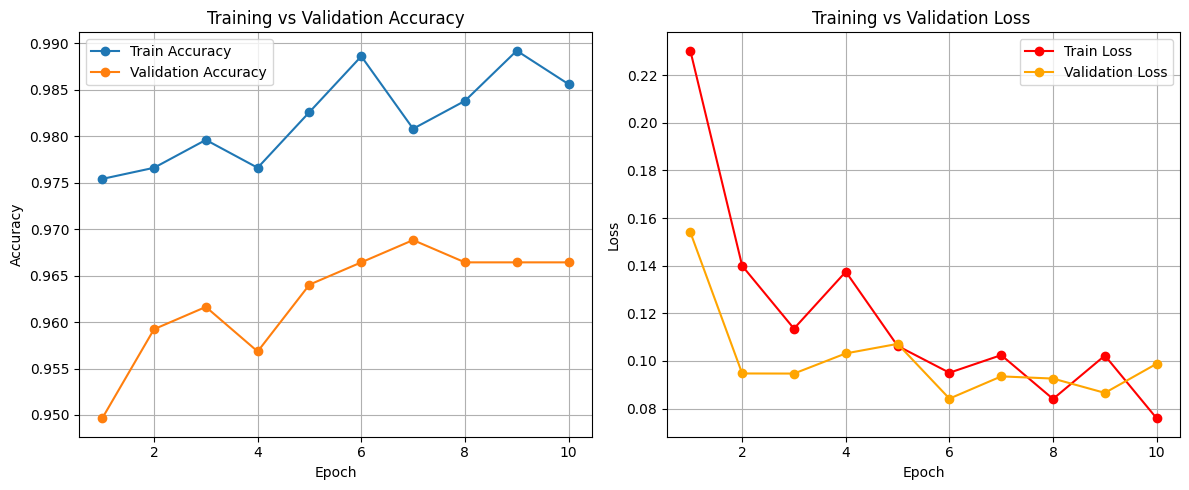


📊 Training graphs saved as 'training_metrics_resnet152_15ep.png'


In [ ]:
# ===============================================================
# 📈 PLOT TRAINING METRICS (Accuracy and Loss) — for 15 epochs
# ===============================================================
import matplotlib.pyplot as plt
import pandas as pd

# Load history if not already in memory
history = pd.read_csv("training_history_15ep.csv")

plt.figure(figsize=(12, 5))

# ---- Accuracy Plot ----
plt.subplot(1, 2, 1)
plt.plot(history["epoch"], history["train_accuracy"], label="Train Accuracy", marker='o')
plt.plot(history["epoch"], history["val_accuracy"], label="Validation Accuracy", marker='o')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
# plt.xticks(range(1, 11))
plt.legend()
plt.grid(True)

# ---- Loss Plot ----
plt.subplot(1, 2, 2)
plt.plot(history["epoch"], history["train_loss"], label="Train Loss", marker='o', color='red')
plt.plot(history["epoch"], history["val_loss"], label="Validation Loss", marker='o', color='orange')
plt.title("Training vs Validation Loss ")
plt.xlabel("Epoch")
plt.ylabel("Loss")
# plt.xticks(range(1, 11))
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("training_metrics_resnet152_15ep.png", dpi=300)
plt.show()

print("\n📊 Training graphs saved as 'training_metrics_resnet152_15ep.png'")
